In [150]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

In [151]:
import seaborn as sns
sns.set_context("poster")

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

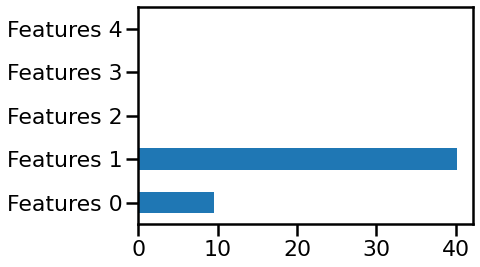

In [152]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

In [153]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

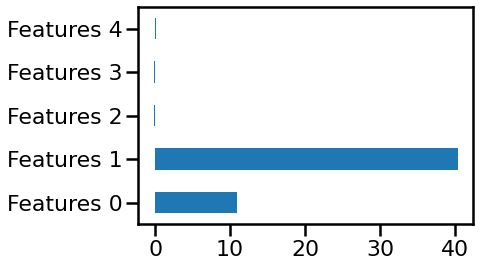

In [154]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

In [155]:
import numpy as np

data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

In [156]:
linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([-2.49787279e+11, -1.29659005e+14, -2.14184092e-01, -1.41943630e-01,
        8.39309212e-02,  1.24893640e+11,  6.48295024e+13,  1.24893640e+11,
        6.48295024e+13])

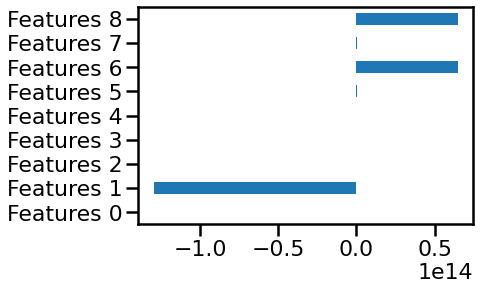

In [157]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

In [158]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(data, target)
ridge.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

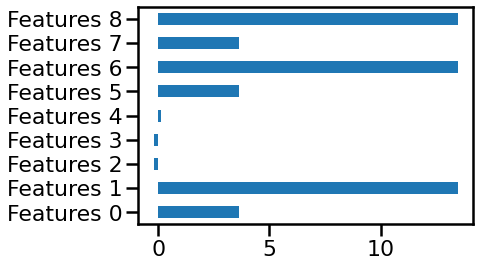

In [159]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

In [160]:
ridge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])

In [167]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1e-16)
ridge.fit(data, target)
ridge.coef_

array([-1.69645813e+03, -3.61531743e+03, -2.05424545e-01, -1.89544618e-01,
        1.11297684e-01,  8.53677002e+02,  1.82786436e+03,  8.53677002e+02,
        1.82786436e+03])

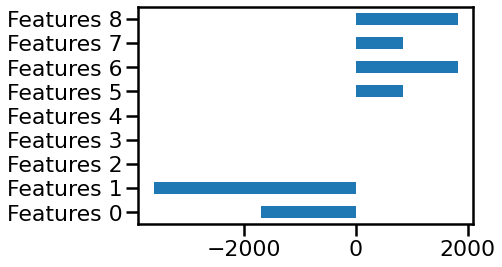

In [168]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

In [169]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1e-5)
ridge.fit(data, target)
ridge.coef_

array([ 3.63195678, 13.47042752, -0.20542455, -0.18954462,  0.11129768,
        3.63195661, 13.47042728,  3.63195663, 13.47042555])

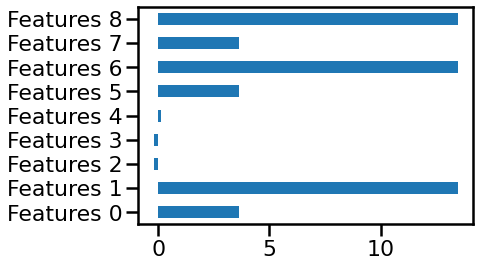

In [170]:
coef = pd.Series(ridge.coef_, index=feature_names)
_ = coef.plot.barh()

In [171]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(data, target)
lasso.coef_

array([ 9.91098848e+00,  3.93553463e+01, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.81257520e-14,  0.00000000e+00,
        3.66593769e-16])

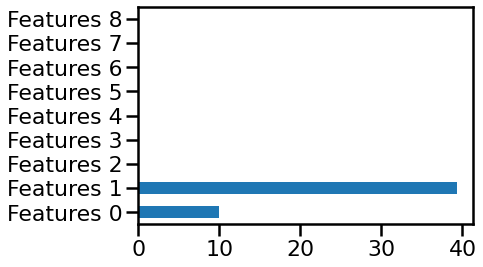

In [172]:
coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

In [179]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e5)
lasso.fit(data, target)
lasso.coef_

array([ 0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.])

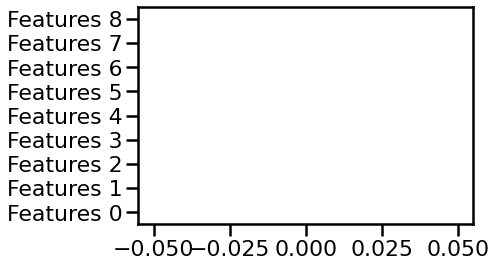

In [180]:
coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

In [182]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e-2)
lasso.fit(data, target)
lasso.coef_

array([ 1.08855581e+01,  4.04007633e+01, -1.95965245e-01, -1.79281557e-01,
        1.00503690e-01,  2.88632093e-14,  0.00000000e+00,  3.67144541e-16,
        0.00000000e+00])

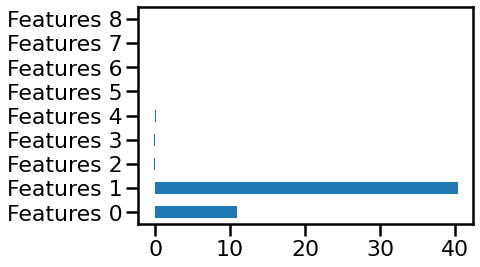

In [183]:
coef = pd.Series(lasso.coef_, index=feature_names)
_ = coef.plot.barh()

In [112]:
data = pd.read_csv("../datasets/penguins_classification.csv")
data = data[data["Species"].isin(["Adelie", "Chinstrap"])]
data["Species"] = data["Species"].astype("category")
data.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [113]:
X, y = data[["Culmen Length (mm)", "Culmen Depth (mm)"]], data["Species"]

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

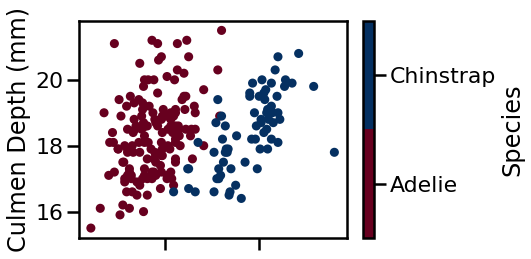

In [118]:
import matplotlib.pyplot as plt

data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap=plt.cm.RdBu, s=50,
)

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

/Users/glemaitre/mambaforge/envs/teaching/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


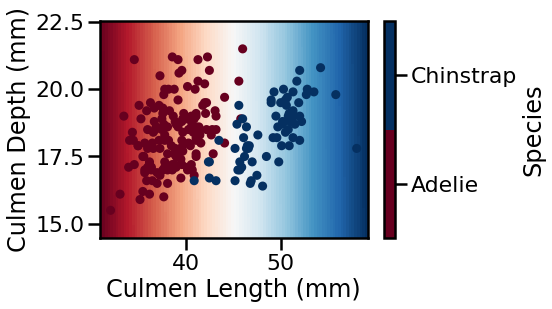

In [136]:
from helper.plotting import DecisionBoundaryDisplay

display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap=plt.cm.RdBu, s=50, ax=display.ax_
)

In [137]:
model = LogisticRegression(C=1e5)
model.fit(X, y)

LogisticRegression(C=100000.0)

<AxesSubplot:>

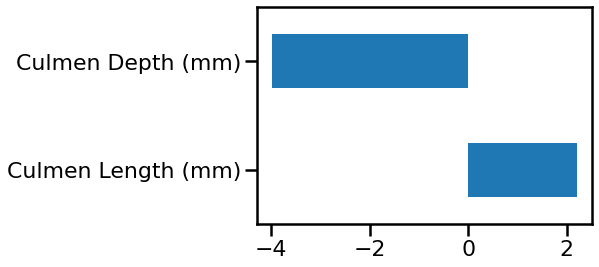

In [145]:
_ = pd.Series(model.coef_[0], index=X.columns).plot.barh()

/Users/glemaitre/mambaforge/envs/teaching/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


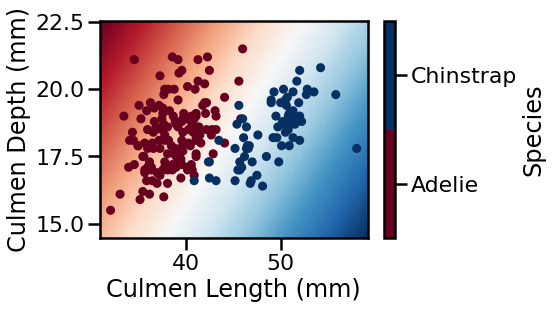

In [146]:
display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap=plt.cm.RdBu, s=50, ax=display.ax_,
)

In [147]:
model = LogisticRegression(C=1e-5)
model.fit(X, y)

LogisticRegression(C=1e-05)

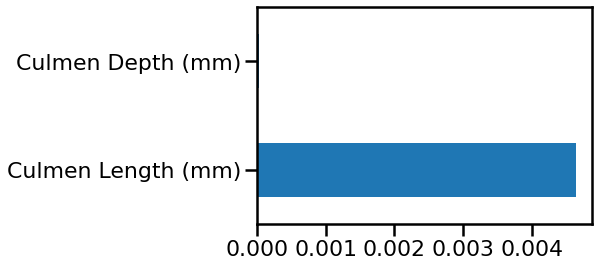

In [148]:
_ = pd.Series(model.coef_[0], index=X.columns).plot.barh()

/Users/glemaitre/mambaforge/envs/teaching/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


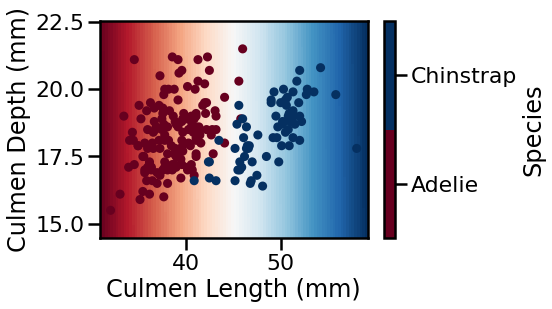

In [149]:
display = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    cmap=plt.cm.RdBu,
    plot_method="pcolormesh",
    shading="auto",
)
_ = data.plot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", c="Species",
    cmap=plt.cm.RdBu, s=50, ax=display.ax_,
)